In [1]:
# PREPROCESS STEP

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


print(df['reviewText'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1       purchas devic work advertis never much phone m...
2       work expect sprung higher capac think made bit...
3       think work greathad diff bran 64gb card went s...
4       bought retail packag arriv legit orang envelop...
5       mini storag doesnt anyth els suppos purchas ad...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspir 3 ...
4911    use extend capabl samsung galaxi note 10 great...
4912    great card fast reliabl come option adapt sd s...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing 64gb micro sd card crap we...
Name: reviewText, Length: 4913, dtype: object


In [2]:
#PRINT REVIW TEXT WITH REVIEW NAME

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))



# PRINT REVIWER NAME AND PREPROCESSED REVIEW TEXT TOGHETR fFOR FIRST 5 ROWS
for index, row in df.iterrows():
    print("Reviewer Name:", row['reviewerName'])
    print("Review Text:", row['reviewText'])
    print()
    
   
    if index == 4:   # PRINT ONLY F 5 ROWS
        break

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reviewer Name: 0mie
Review Text: purchas devic work advertis never much phone memori sinc download lot stuff brainer

Reviewer Name: 1K3
Review Text: work expect sprung higher capac think made bit cheesier earlier version paint look clean

Reviewer Name: 1m2
Review Text: think work greathad diff bran 64gb card went south 3 monthsthi one held pretti well sinc s3 note3 updat 32114ive month zero issu sinc transfer s3 note3 note2 card reliabl solidch

Reviewer Name: 2&amp;1/2Men
Review Text: bought retail packag arriv legit orang envelop english version asian like pictur show arriv quickli bought 32 16 retail packag htc one sv lg optimu card work order probabl best price youll get nice sd card



In [3]:
#sentiment score is calculated using the VADER lexicon
#SentimentIntensityAnalyzer from NLTK's nltk.sentiment
#use a pre-trained sentiment analysis model or a sentiment lexicon.
#using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool



import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))



# SENTIMENT ANALYSE USING VADER
sia = SentimentIntensityAnalyzer()

# SELECT 5 ROWS TO PERINT
num_rows = 5

# ITERATE OVER THE DATAFRAME
for index, row in df.iterrows():
    review = row['reviewText']
    sentiment_scores = sia.polarity_scores(review)
    
    print("Reviewer Name:", row['reviewerName'])
    print("Review Text:", review)
    print("Sentiment Score:", sentiment_scores['compound'])
    print()
    

    if index == num_rows - 1:
        break

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Reviewer Name: 0mie
Review Text: purchas devic work advertis never much phone memori sinc download lot stuff brainer
Sentiment Score: 0.0

Reviewer Name: 1K3
Review Text: work expect sprung higher capac think made bit cheesier earlier version paint look clean
Sentiment Score: 0.4019

Reviewer Name: 1m2
Review Text: think work greathad diff bran 64gb card went south 3 monthsthi one held pretti well sinc s3 note3 updat 32114ive month zero issu sinc transfer s3 note3 note2 card reliabl solidch
Sentiment Score: 0.2732

Reviewer Name: 2&amp;1/2Men
Review Text: bought retail packag arriv legit orang envelop english version asian like pictur show arriv quickli bought 32 16 retail packag htc one sv lg optimu card work order probabl best price youll get nice sd card
Sentiment Score: 0.8591



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


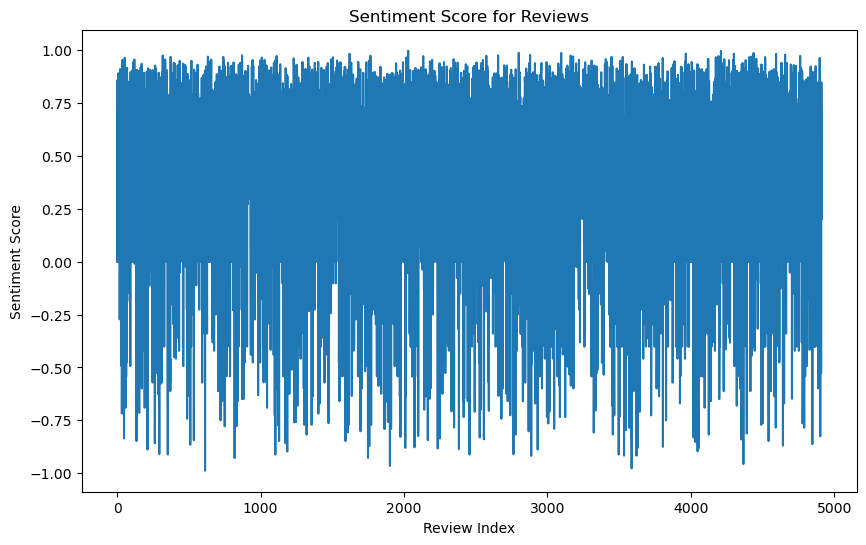

In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#sentiment analysis using vader
sia = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in df.iterrows():
    review = row['reviewText']
    sentiment_score = sia.polarity_scores(review)['compound']
    sentiment_scores.append(sentiment_score)

# created polt sentiment score
plt.figure(figsize=(10, 6))
plt.plot(range(len(sentiment_scores)), sentiment_scores)
plt.xlabel('Review Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score for Reviews')
plt.show()